In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd

#查看tf 和 keras 的版本
print(tf.__version__)
print(tf.keras.__version__)

2.1.0
2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing
#导入加利福利亚的房价信息

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
# 切分训练集，测试集
from sklearn.model_selection import train_test_split

x_train_all ,x_test ,y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state = 11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_valid_scaler = scaler.fit_transform(x_valid)
x_test_scaler = scaler.fit_transform(x_test)

In [16]:
#子类API
class WideDeepModel(keras.models.Model):
    def __init__(self):
        super(WideDeepModel, self).__init__()
        """定义模型层次"""
        self.hidden1_layer = keras.layers.Dense(30, activation='relu')
        self.hidden2_layer = keras.layers.Dense(30, activation='relu')
        self.output_layer = keras.layers.Dense(1)
        
    def call(self,input):
        """模型的正想计算"""
        hidden1 = self.hidden1_layer(input)
        hidden2 = self.hidden2_layer(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_layer(concat)
        return output

# model = WideDeepModel()


#另一种构建方法
model = keras.models.Sequential([
   WideDeepModel(),
])
 
model.build(input_shape = (None,8))
model.summary()
model.compile(loss="mean_squared_error", optimizer="adam")
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=0.000001)]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
wide_deep_model_2 (WideDeepM multiple                  1239      
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train_scaler, y_train,
                    validation_data = (x_valid_scaler,y_valid),
                    epochs = 100,
                    callbacks = callbacks       
                   )

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 67us/sample - loss: 1.5486 - val_loss: 0.6021
Epoch 2/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4830 - val_loss: 0.4141
Epoch 3/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3909 - val_loss: 0.4108
Epoch 4/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3693 - val_loss: 0.4018
Epoch 5/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3605 - val_loss: 0.4040
Epoch 6/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3550 - val_loss: 0.3948
Epoch 7/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3520 - val_loss: 0.3919
Epoch 8/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3420 - val_loss: 0.3805
Epoch 9/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.338

In [8]:
print(history.history)

{'loss': [1.5485562552058625, 0.48302679442825447, 0.3908735468611442, 0.3692878643029933, 0.3604958255520984, 0.35496354561032767, 0.35203102831179267, 0.34200283029950146, 0.33843669183135133, 0.33806012106496236, 0.33024207328949173, 0.3232895930043384, 0.3238119710734135, 0.3177095417879862, 0.3154099513291286, 0.31044797659639034, 0.3069737333865334, 0.30328100807804365], 'val_loss': [0.6021074893092616, 0.41405129096150706, 0.41083073978738266, 0.40182309778315767, 0.4039599433040742, 0.39483432130604135, 0.391853714035463, 0.3804656289036576, 0.3858069129076423, 0.4095098206316162, 0.396572796819438, 0.40622662026290746, 0.3669946849731204, 0.3854765870389396, 0.3977254757739469, 0.4415254031579932, 0.3801791912748524, 0.40375114659314315]}


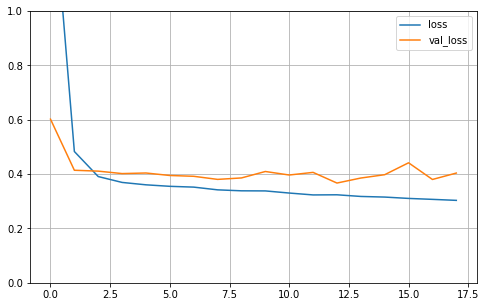

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

In [10]:
model.evaluate(x_test_scaler, y_test)

5160/5160 [==============================] - 0s 17us/sample - loss: 0.3821


0.3821158253869345